In [1]:
import pandas as pd
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
data = pd.read_csv('Resources/Impact_of_Remote_Work_on_Mental_Health.csv')  # Make sure the path is correct

# MongoDB Connection
try:
    # Connect to MongoDB
    client = MongoClient('mongodb://localhost:27017/')
    db = client['remote_work_db']
    collection = db['mental_health']

    # Clear the collection and insert new data
    collection.delete_many({})
    collection.insert_many(data.to_dict('records'))

    print("Data loaded into MongoDB successfully!")

except Exception as e:
    print(f"An error occurred during MongoDB interaction: {e}")



Data loaded into MongoDB successfully!


In [2]:
# Retrieve data from MongoDB
data = pd.DataFrame(list(collection.find()))

In [15]:
# Data Cleaning Function
def clean_data(df):
    # Handle missing values
    df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('None')
    df['Physical_Activity'] = df['Physical_Activity'].fillna('None')

    # Standardize categorical values
    df['Gender'] = df['Gender'].str.capitalize()
    df['Job_Role'] = df['Job_Role'].str.title().replace({'Hr': 'HR'})
    df['Industry'] = df['Industry'].str.title().replace({'It': 'IT'})
    df['Work_Location'] = df['Work_Location'].str.capitalize()
    df['Stress_Level'] = df['Stress_Level'].str.capitalize().replace({'Low ': 'Low'})
    df['Productivity_Change'] = df['Productivity_Change'].str.title()
    df['Satisfaction_with_Remote_Work'] = df['Satisfaction_with_Remote_Work'].str.title()
    df['Access_to_Mental_Health_Resources'] = df['Access_to_Mental_Health_Resources'].str.capitalize()
    df['Sleep_Quality'] = df['Sleep_Quality'].str.title()
    df['Region'] = df['Region'].str.title()
    
    # Handling outliers in 'Hours_Worked_Per_Week'
    df['Hours_Worked_Per_Week'] = df['Hours_Worked_Per_Week'].clip(lower=20, upper=60)
    
    return df

# Apply the cleaning function to the dataset
data_cleaned = clean_data(data)

# Sort unique values for dropdown menus after cleaning
mental_health_conditions = sorted(data_cleaned['Mental_Health_Condition'].unique())
physical_activity = sorted(data_cleaned['Physical_Activity'].unique())

# You can similarly sort other columns as needed:
# job_roles, regions, work_locations, stress_levels, etc.


In [4]:
# Checking for duplicates
duplicates = data_cleaned.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")


Number of duplicate records: 0


In [5]:
# Summary Statistics
print("Numerical Summary Statistics:")
print(data_cleaned.describe())

print("Categorical Summary Statistics:")
print(data_cleaned.describe(include='object'))



Numerical Summary Statistics:
               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000 

In [6]:
# Check unique values in all cleaned categorical columns
for col in ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 
            'Productivity_Change', 'Satisfaction_with_Remote_Work', 
            'Access_to_Mental_Health_Resources', 'Sleep_Quality', 'Region']:
    print(f"Unique values in {col}: {data_cleaned[col].unique()}")

Unique values in Gender: ['Non-binary' 'Female' 'Male' 'Prefer not to say']
Unique values in Job_Role: ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
Unique values in Industry: ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']
Unique values in Work_Location: ['Hybrid' 'Remote' 'Onsite']
Unique values in Stress_Level: ['Medium' 'High' 'Low']
Unique values in Productivity_Change: ['Decrease' 'Increase' 'No Change']
Unique values in Satisfaction_with_Remote_Work: ['Unsatisfied' 'Satisfied' 'Neutral']
Unique values in Access_to_Mental_Health_Resources: ['No' 'Yes']
Unique values in Sleep_Quality: ['Good' 'Poor' 'Average']
Unique values in Region: ['Europe' 'Asia' 'North America' 'South America' 'Oceania' 'Africa']


In [9]:
# Visualization Functions
def plot_mental_health_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Mental_Health_Condition', data=df, palette='coolwarm')
    plt.title('Distribution of Mental Health Conditions')
    plt.xticks(rotation=45)
    plt.show()

def plot_work_life_balance_stress(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Job_Role', y='Work_Life_Balance_Rating', hue='Stress_Level', data=df)
    plt.title('Work-Life Balance and Stress Levels by Job Role')
    plt.xticks(rotation=45)
    plt.show()

def plot_physical_activity_sleep(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Physical_Activity', hue='Sleep_Quality', data=df)
    plt.title('Physical Activity vs Sleep Quality')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\leahm\AppData\Local\Temp\ipykernel_10796\75927378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mental_Health_Condition', data=df, palette='coolwarm')


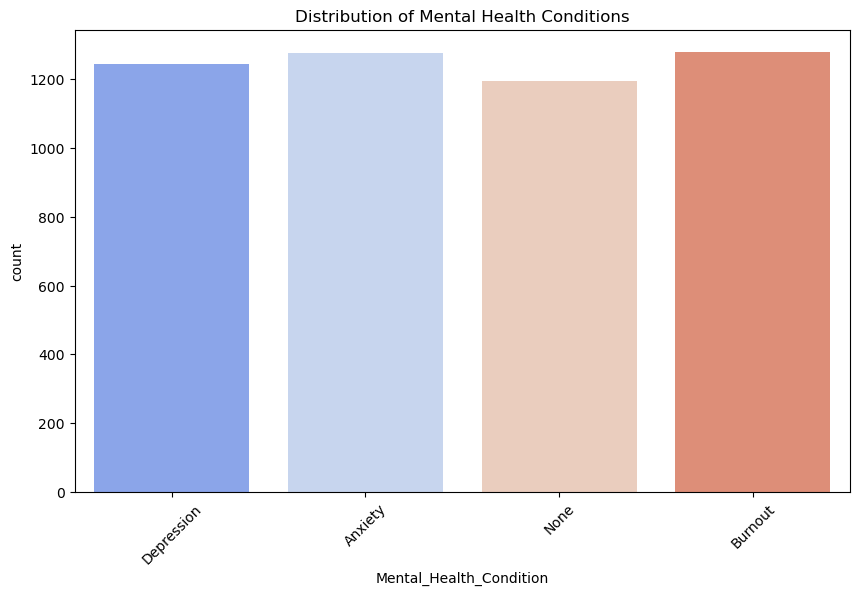

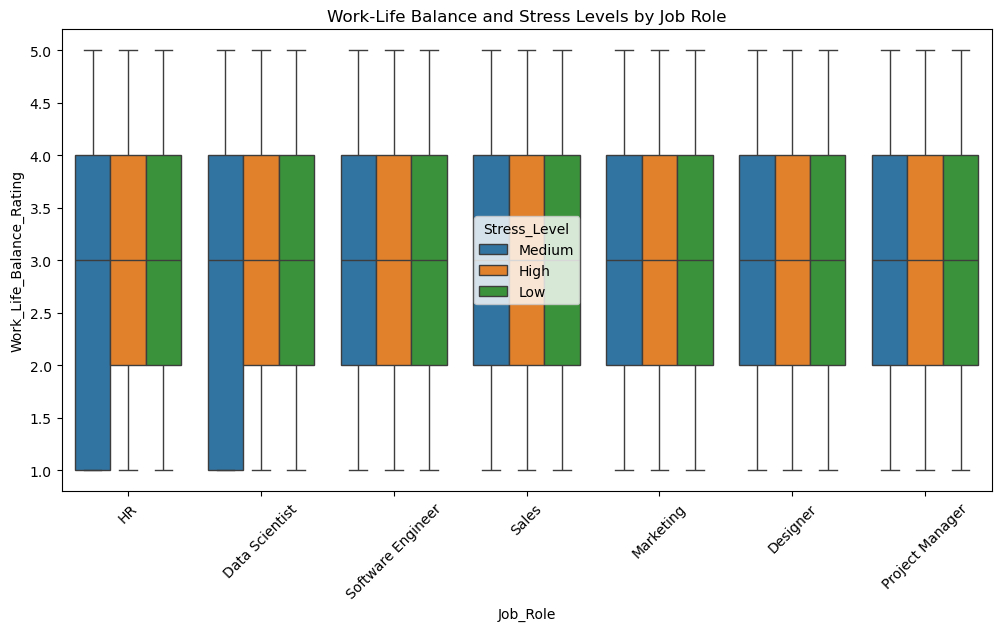

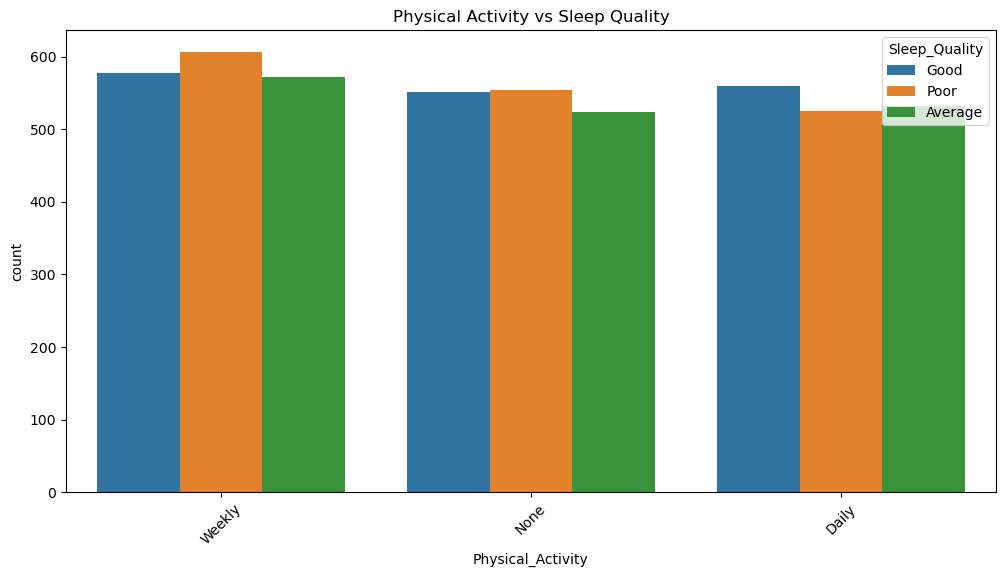

In [10]:
# Execute visualizations
plot_mental_health_distribution(data_cleaned)
plot_work_life_balance_stress(data_cleaned)
plot_physical_activity_sleep(data_cleaned)